# Few shot learning: Siamese vs Traditional CNN

In [1]:
%matplotlib inline

import torch
import numpy as np
import pandas as pd
from copy import deepcopy
from tabulate import tabulate
from torch import optim
import torchvision.utils
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn import CrossEntropyLoss
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,random_split

import config
from utils import imshow
from models import SiameseNetwork, CNN
from training import trainSiamese,inferenceSiamese, trainCNN
from datasets import SiameseNetworkDataset, CNNDataset,generate_csv_compare
from loss_functions import ContrastiveLoss

# generate_csv(config.training_dir)

import os
if not os.path.exists('state_dict'):
    os.makedirs('state_dict')

## Generate Dateset with a few images per class

In [2]:
generate_csv_compare(config.training_dir,config.compare_siamese_csv,config.compare_cnn_csv,config.compare_test_csv,
                     num_per_class = 4)

Data directory:  ../../datasets/AT&T Database of Faces/faces/training


## Training Siamese Network

Epoch  0  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.05it/s]


Epoch  0  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.04it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:3.03	 min:0.99	 mean:1.94	 median 2.01
-1 features max:3.04	 min:1.52	 mean:2.25	 median 2.09
Feature = 0	Threshold = 1.742426	Polorization = 1
Epoch-0	 Train loss: 2.4193e+00	 Valid loss: 1.9499e+00	 Valid error: 0.3333
Epoch  1  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.66it/s]


Epoch  1  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 61.10it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.83	 min:0.89	 mean:1.36	 median 1.38
-1 features max:3.17	 min:1.25	 mean:1.96	 median 1.85
Feature = 0	Threshold = 1.837113	Polorization = 1
Epoch-1	 Train loss: 5.7495e+00	 Valid loss: 9.2415e-01	 Valid error: 0.2381
new model saved
Epoch  2  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.65it/s]


Epoch  2  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.58it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.70	 min:0.69	 mean:1.25	 median 1.27
-1 features max:3.05	 min:1.26	 mean:1.82	 median 1.53
Feature = 0	Threshold = 1.419907	Polorization = 1
Epoch-2	 Train loss: 3.4514e+00	 Valid loss: 7.8039e-01	 Valid error: 0.1905
new model saved
Epoch  3  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.60it/s]


Epoch  3  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.89it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.46	 min:0.54	 mean:1.07	 median 1.02
-1 features max:2.98	 min:1.07	 mean:1.87	 median 1.61
Feature = 0	Threshold = 1.469550	Polorization = 1
Epoch-3	 Train loss: 1.9253e+00	 Valid loss: 5.8067e-01	 Valid error: 0.0952
new model saved
Epoch  4  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.59it/s]


Epoch  4  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 57.32it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.51	 min:0.67	 mean:1.06	 median 1.07
-1 features max:3.94	 min:1.14	 mean:2.08	 median 1.83
Feature = 0	Threshold = 1.384077	Polorization = 1
Epoch-4	 Train loss: 1.2698e+00	 Valid loss: 5.6448e-01	 Valid error: 0.1429
new model saved
Epoch  5  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.58it/s]


Epoch  5  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.22it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.58	 min:0.61	 mean:1.01	 median 0.96
-1 features max:3.90	 min:1.21	 mean:2.10	 median 1.90
Feature = 0	Threshold = 1.197687	Polorization = 1
Epoch-5	 Train loss: 1.1282e+00	 Valid loss: 5.2291e-01	 Valid error: 0.1429
new model saved
Epoch  6  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.61it/s]


Epoch  6  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.69it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.56	 min:0.53	 mean:0.93	 median 0.90
-1 features max:3.96	 min:1.21	 mean:2.12	 median 1.83
Feature = 0	Threshold = 1.180515	Polorization = 1
Epoch-6	 Train loss: 1.0986e+00	 Valid loss: 4.5666e-01	 Valid error: 0.0476
new model saved
Epoch  7  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.56it/s]


Epoch  7  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 57.09it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.59	 min:0.43	 mean:0.88	 median 0.86
-1 features max:3.89	 min:1.30	 mean:2.08	 median 1.71
Feature = 0	Threshold = 1.202617	Polorization = 1
Epoch-7	 Train loss: 4.5120e-01	 Valid loss: 4.1524e-01	 Valid error: 0.0476
new model saved
Epoch  8  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.47it/s]


Epoch  8  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.30it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.55	 min:0.36	 mean:0.84	 median 0.84
-1 features max:4.21	 min:1.32	 mean:2.06	 median 1.71
Feature = 0	Threshold = 1.207613	Polorization = 1
Epoch-8	 Train loss: 2.4907e-01	 Valid loss: 3.8092e-01	 Valid error: 0.0476
new model saved
Epoch  9  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.58it/s]


Epoch  9  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.61it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.36	 min:0.35	 mean:0.79	 median 0.76
-1 features max:4.33	 min:1.11	 mean:1.99	 median 1.69
Feature = 0	Threshold = 1.090722	Polorization = 1
Epoch-9	 Train loss: 6.0915e-01	 Valid loss: 3.3024e-01	 Valid error: 0.0476
new model saved
Epoch  10  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.68it/s]


Epoch  10  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 56.34it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.22	 min:0.37	 mean:0.74	 median 0.66
-1 features max:4.31	 min:0.96	 mean:1.93	 median 1.66
Feature = 0	Threshold = 0.926601	Polorization = 1
Epoch-10	 Train loss: 1.7855e-01	 Valid loss: 2.8417e-01	 Valid error: 0.0952
new model saved
Epoch  11  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.67it/s]


Epoch  11  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 62.80it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.18	 min:0.39	 mean:0.72	 median 0.66
-1 features max:4.27	 min:0.91	 mean:1.90	 median 1.64
Feature = 0	Threshold = 0.897071	Polorization = 1
Epoch-11	 Train loss: 4.2421e-01	 Valid loss: 2.6921e-01	 Valid error: 0.0952
new model saved
Epoch  12  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.65it/s]


Epoch  12  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 63.50it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.13	 min:0.40	 mean:0.71	 median 0.64
-1 features max:4.53	 min:0.94	 mean:1.94	 median 1.71
Feature = 0	Threshold = 0.906016	Polorization = 1
Epoch-12	 Train loss: 2.0390e-01	 Valid loss: 2.6901e-01	 Valid error: 0.0952
new model saved
Epoch  13  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.70it/s]


Epoch  13  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 62.07it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.24	 min:0.39	 mean:0.71	 median 0.60
-1 features max:4.84	 min:1.00	 mean:2.02	 median 1.87
Feature = 0	Threshold = 0.942571	Polorization = 1
Epoch-13	 Train loss: 1.2627e-01	 Valid loss: 2.7356e-01	 Valid error: 0.0952
new model saved
Epoch  14  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.75it/s]


Epoch  14  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.34it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.23	 min:0.38	 mean:0.69	 median 0.56
-1 features max:4.78	 min:0.98	 mean:2.00	 median 1.88
Feature = 0	Threshold = 0.965582	Polorization = 1
Epoch-14	 Train loss: 1.9024e-01	 Valid loss: 2.6108e-01	 Valid error: 0.0476
new model saved
Epoch  15  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.74it/s]


Epoch  15  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.39it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.19	 min:0.39	 mean:0.67	 median 0.55
-1 features max:4.62	 min:0.95	 mean:1.96	 median 1.86
Feature = 0	Threshold = 0.940565	Polorization = 1
Epoch-15	 Train loss: 1.0013e-01	 Valid loss: 2.5064e-01	 Valid error: 0.0476
new model saved
Epoch  16  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.58it/s]


Epoch  16  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.73it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.15	 min:0.38	 mean:0.65	 median 0.54
-1 features max:4.48	 min:0.91	 mean:1.91	 median 1.82
Feature = 0	Threshold = 0.897824	Polorization = 1
Epoch-16	 Train loss: 1.0481e-01	 Valid loss: 2.3592e-01	 Valid error: 0.0952
new model saved
Epoch  17  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.57it/s]


Epoch  17  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.91it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.11	 min:0.35	 mean:0.62	 median 0.51
-1 features max:4.41	 min:0.87	 mean:1.88	 median 1.79
Feature = 0	Threshold = 0.860548	Polorization = 1
Epoch-17	 Train loss: 1.0053e-01	 Valid loss: 2.1791e-01	 Valid error: 0.0952
new model saved
Epoch  18  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.53it/s]


Epoch  18  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 61.17it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.10	 min:0.32	 mean:0.60	 median 0.48
-1 features max:4.40	 min:0.86	 mean:1.86	 median 1.81
Feature = 0	Threshold = 0.856522	Polorization = 1
Epoch-18	 Train loss: 4.6055e-02	 Valid loss: 2.0137e-01	 Valid error: 0.0476
new model saved
Epoch  19  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.52it/s]


Epoch  19  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 57.28it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.10	 min:0.29	 mean:0.58	 median 0.45
-1 features max:4.45	 min:0.86	 mean:1.86	 median 1.85
Feature = 0	Threshold = 0.842860	Polorization = 1
Epoch-19	 Train loss: 4.0738e-02	 Valid loss: 1.9200e-01	 Valid error: 0.0476
new model saved
Epoch  20  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.57it/s]


Epoch  20  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 60.01it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.10	 min:0.27	 mean:0.57	 median 0.43
-1 features max:4.52	 min:0.85	 mean:1.87	 median 1.90
Feature = 0	Threshold = 0.833348	Polorization = 1
Epoch-20	 Train loss: 3.7872e-02	 Valid loss: 1.8809e-01	 Valid error: 0.0476
new model saved
Epoch  21  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.62it/s]


Epoch  21  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 61.35it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.10	 min:0.26	 mean:0.56	 median 0.42
-1 features max:4.57	 min:0.84	 mean:1.87	 median 1.89
Feature = 0	Threshold = 0.829030	Polorization = 1
Epoch-21	 Train loss: 4.5468e-02	 Valid loss: 1.8752e-01	 Valid error: 0.0476
new model saved
Epoch  22  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.66it/s]


Epoch  22  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 61.16it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.09	 min:0.26	 mean:0.56	 median 0.41
-1 features max:4.55	 min:0.82	 mean:1.87	 median 1.88
Feature = 0	Threshold = 0.817259	Polorization = 1
Epoch-22	 Train loss: 3.1350e-02	 Valid loss: 1.8436e-01	 Valid error: 0.0476
new model saved
Epoch  23  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.63it/s]


Epoch  23  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 56.71it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.07	 min:0.26	 mean:0.55	 median 0.40
-1 features max:4.52	 min:0.81	 mean:1.85	 median 1.85
Feature = 0	Threshold = 0.803255	Polorization = 1
Epoch-23	 Train loss: 2.4956e-02	 Valid loss: 1.7970e-01	 Valid error: 0.0476
new model saved
Epoch  24  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.65it/s]


Epoch  24  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 57.32it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.06	 min:0.26	 mean:0.55	 median 0.40
-1 features max:4.51	 min:0.80	 mean:1.83	 median 1.82
Feature = 0	Threshold = 0.789585	Polorization = 1
Epoch-24	 Train loss: 2.4957e-02	 Valid loss: 1.7557e-01	 Valid error: 0.0476
new model saved
Epoch  25  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.61it/s]


Epoch  25  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.44it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.06	 min:0.26	 mean:0.54	 median 0.40
-1 features max:4.52	 min:0.79	 mean:1.82	 median 1.80
Feature = 0	Threshold = 0.788219	Polorization = 1
Epoch-25	 Train loss: 2.3448e-02	 Valid loss: 1.7273e-01	 Valid error: 0.0476
new model saved
Epoch  26  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.61it/s]


Epoch  26  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 60.73it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.06	 min:0.25	 mean:0.54	 median 0.39
-1 features max:4.52	 min:0.79	 mean:1.81	 median 1.79
Feature = 0	Threshold = 0.792113	Polorization = 1
Epoch-26	 Train loss: 1.8819e-02	 Valid loss: 1.7011e-01	 Valid error: 0.0476
new model saved
Epoch  27  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.67it/s]


Epoch  27  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.22it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.06	 min:0.25	 mean:0.53	 median 0.38
-1 features max:4.49	 min:0.80	 mean:1.80	 median 1.80
Feature = 0	Threshold = 0.795631	Polorization = 1
Epoch-27	 Train loss: 1.9539e-02	 Valid loss: 1.6694e-01	 Valid error: 0.0476
new model saved
Epoch  28  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.72it/s]


Epoch  28  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 57.33it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.05	 min:0.25	 mean:0.53	 median 0.38
-1 features max:4.42	 min:0.80	 mean:1.79	 median 1.76
Feature = 0	Threshold = 0.789720	Polorization = 1
Epoch-28	 Train loss: 1.7185e-02	 Valid loss: 1.6394e-01	 Valid error: 0.0476
new model saved
Epoch  29  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.73it/s]


Epoch  29  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 56.07it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.05	 min:0.26	 mean:0.52	 median 0.39
-1 features max:4.34	 min:0.80	 mean:1.77	 median 1.71
Feature = 0	Threshold = 0.777202	Polorization = 1
Epoch-29	 Train loss: 2.4451e-02	 Valid loss: 1.6068e-01	 Valid error: 0.0476
new model saved
Epoch  30  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.63it/s]


Epoch  30  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.83it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.04	 min:0.26	 mean:0.52	 median 0.39
-1 features max:4.30	 min:0.79	 mean:1.77	 median 1.68
Feature = 0	Threshold = 0.770048	Polorization = 1
Epoch-30	 Train loss: 1.5505e-02	 Valid loss: 1.5860e-01	 Valid error: 0.0476
new model saved
Epoch  31  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.67it/s]


Epoch  31  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.42it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.04	 min:0.26	 mean:0.52	 median 0.39
-1 features max:4.28	 min:0.79	 mean:1.76	 median 1.67
Feature = 0	Threshold = 0.763552	Polorization = 1
Epoch-31	 Train loss: 1.8601e-02	 Valid loss: 1.5639e-01	 Valid error: 0.0476
new model saved
Epoch  32  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.67it/s]


Epoch  32  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.05it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.03	 min:0.25	 mean:0.51	 median 0.39
-1 features max:4.26	 min:0.78	 mean:1.75	 median 1.65
Feature = 0	Threshold = 0.758362	Polorization = 1
Epoch-32	 Train loss: 1.3523e-02	 Valid loss: 1.5418e-01	 Valid error: 0.0476
new model saved
Epoch  33  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.59it/s]


Epoch  33  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.81it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.02	 min:0.25	 mean:0.51	 median 0.38
-1 features max:4.25	 min:0.77	 mean:1.75	 median 1.64
Feature = 0	Threshold = 0.753613	Polorization = 1
Epoch-33	 Train loss: 8.9992e-03	 Valid loss: 1.5231e-01	 Valid error: 0.0476
new model saved
Epoch  34  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.57it/s]


Epoch  34  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 60.11it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.01	 min:0.25	 mean:0.50	 median 0.38
-1 features max:4.27	 min:0.76	 mean:1.74	 median 1.64
Feature = 0	Threshold = 0.747917	Polorization = 1
Epoch-34	 Train loss: 1.4026e-02	 Valid loss: 1.5050e-01	 Valid error: 0.0476
new model saved
Epoch  35  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.62it/s]


Epoch  35  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 62.26it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.02	 min:0.26	 mean:0.50	 median 0.37
-1 features max:4.31	 min:0.75	 mean:1.74	 median 1.64
Feature = 0	Threshold = 0.744549	Polorization = 1
Epoch-35	 Train loss: 9.6773e-03	 Valid loss: 1.4913e-01	 Valid error: 0.0476
new model saved
Epoch  36  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.54it/s]


Epoch  36  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 60.14it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.02	 min:0.26	 mean:0.50	 median 0.37
-1 features max:4.36	 min:0.74	 mean:1.75	 median 1.65
Feature = 0	Threshold = 0.726508	Polorization = 1
Epoch-36	 Train loss: 7.6289e-03	 Valid loss: 1.4844e-01	 Valid error: 0.0952
new model saved
Epoch  37  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.61it/s]


Epoch  37  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.07it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.03	 min:0.26	 mean:0.50	 median 0.37
-1 features max:4.39	 min:0.74	 mean:1.75	 median 1.66
Feature = 0	Threshold = 0.718021	Polorization = 1
Epoch-37	 Train loss: 5.8070e-03	 Valid loss: 1.4794e-01	 Valid error: 0.0952
new model saved
Epoch  38  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.69it/s]


Epoch  38  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 55.73it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.03	 min:0.26	 mean:0.50	 median 0.36
-1 features max:4.41	 min:0.74	 mean:1.75	 median 1.66
Feature = 0	Threshold = 0.712636	Polorization = 1
Epoch-38	 Train loss: 6.4308e-03	 Valid loss: 1.4777e-01	 Valid error: 0.0952
new model saved
Epoch  39  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.72it/s]


Epoch  39  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 56.39it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.03	 min:0.25	 mean:0.49	 median 0.36
-1 features max:4.40	 min:0.74	 mean:1.75	 median 1.66
Feature = 0	Threshold = 0.709857	Polorization = 1
Epoch-39	 Train loss: 7.3336e-03	 Valid loss: 1.4710e-01	 Valid error: 0.0952
new model saved
Epoch  40  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.53it/s]


Epoch  40  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 55.68it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.03	 min:0.25	 mean:0.49	 median 0.36
-1 features max:4.36	 min:0.75	 mean:1.75	 median 1.65
Feature = 0	Threshold = 0.708772	Polorization = 1
Epoch-40	 Train loss: 8.6463e-03	 Valid loss: 1.4600e-01	 Valid error: 0.0952
new model saved
Epoch  41  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.52it/s]


Epoch  41  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 61.10it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.02	 min:0.25	 mean:0.49	 median 0.36
-1 features max:4.31	 min:0.76	 mean:1.74	 median 1.64
Feature = 0	Threshold = 0.711743	Polorization = 1
Epoch-41	 Train loss: 1.1202e-02	 Valid loss: 1.4485e-01	 Valid error: 0.0952
new model saved
Epoch  42  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.68it/s]


Epoch  42  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.28it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.01	 min:0.25	 mean:0.49	 median 0.36
-1 features max:4.27	 min:0.76	 mean:1.73	 median 1.64
Feature = 0	Threshold = 0.755858	Polorization = 1
Epoch-42	 Train loss: 7.1331e-03	 Valid loss: 1.4353e-01	 Valid error: 0.0476
new model saved
Epoch  43  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.54it/s]


Epoch  43  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 57.84it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.01	 min:0.24	 mean:0.49	 median 0.36
-1 features max:4.26	 min:0.76	 mean:1.73	 median 1.64
Feature = 0	Threshold = 0.749764	Polorization = 1
Epoch-43	 Train loss: 5.2240e-03	 Valid loss: 1.4203e-01	 Valid error: 0.0476
new model saved
Epoch  44  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.49it/s]


Epoch  44  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.51it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.24	 mean:0.49	 median 0.36
-1 features max:4.24	 min:0.76	 mean:1.73	 median 1.65
Feature = 0	Threshold = 0.743703	Polorization = 1
Epoch-44	 Train loss: 9.2132e-03	 Valid loss: 1.4118e-01	 Valid error: 0.0476
new model saved
Epoch  45  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.58it/s]


Epoch  45  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 61.99it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.24	 mean:0.49	 median 0.36
-1 features max:4.23	 min:0.76	 mean:1.73	 median 1.65
Feature = 0	Threshold = 0.741213	Polorization = 1
Epoch-45	 Train loss: 6.3829e-03	 Valid loss: 1.4081e-01	 Valid error: 0.0476
new model saved
Epoch  46  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.64it/s]


Epoch  46  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.19it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.24	 mean:0.49	 median 0.36
-1 features max:4.22	 min:0.76	 mean:1.72	 median 1.65
Feature = 0	Threshold = 0.739059	Polorization = 1
Epoch-46	 Train loss: 6.0695e-03	 Valid loss: 1.4046e-01	 Valid error: 0.0476
new model saved
Epoch  47  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.71it/s]


Epoch  47  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 55.31it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.24	 mean:0.48	 median 0.36
-1 features max:4.21	 min:0.76	 mean:1.72	 median 1.65
Feature = 0	Threshold = 0.736727	Polorization = 1
Epoch-47	 Train loss: 3.8715e-03	 Valid loss: 1.4003e-01	 Valid error: 0.0476
new model saved
Epoch  48  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.50it/s]


Epoch  48  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.55it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.24	 mean:0.48	 median 0.35
-1 features max:4.21	 min:0.76	 mean:1.72	 median 1.65
Feature = 0	Threshold = 0.734436	Polorization = 1
Epoch-48	 Train loss: 1.0198e-02	 Valid loss: 1.3932e-01	 Valid error: 0.0476
new model saved
Epoch  49  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.50it/s]


Epoch  49  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.89it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.24	 mean:0.48	 median 0.36
-1 features max:4.22	 min:0.76	 mean:1.72	 median 1.65
Feature = 0	Threshold = 0.733304	Polorization = 1
Epoch-49	 Train loss: 6.2787e-03	 Valid loss: 1.3886e-01	 Valid error: 0.0476
new model saved
Epoch  50  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.50it/s]


Epoch  50  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 54.03it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.24	 mean:0.48	 median 0.36
-1 features max:4.22	 min:0.75	 mean:1.72	 median 1.65
Feature = 0	Threshold = 0.732333	Polorization = 1
Epoch-50	 Train loss: 5.5816e-03	 Valid loss: 1.3850e-01	 Valid error: 0.0476
new model saved
Epoch  51  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.59it/s]


Epoch  51  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 56.06it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.24	 mean:0.48	 median 0.35
-1 features max:4.24	 min:0.75	 mean:1.72	 median 1.64
Feature = 0	Threshold = 0.731140	Polorization = 1
Epoch-51	 Train loss: 1.0012e-02	 Valid loss: 1.3825e-01	 Valid error: 0.0476
new model saved
Epoch  52  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.59it/s]


Epoch  52  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.34it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.24	 mean:0.48	 median 0.36
-1 features max:4.24	 min:0.75	 mean:1.72	 median 1.64
Feature = 0	Threshold = 0.730070	Polorization = 1
Epoch-52	 Train loss: 8.2408e-03	 Valid loss: 1.3802e-01	 Valid error: 0.0476
new model saved
Epoch  53  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.58it/s]


Epoch  53  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 61.75it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.23	 mean:0.48	 median 0.36
-1 features max:4.25	 min:0.75	 mean:1.72	 median 1.64
Feature = 0	Threshold = 0.728256	Polorization = 1
Epoch-53	 Train loss: 9.4730e-03	 Valid loss: 1.3789e-01	 Valid error: 0.0476
new model saved
Epoch  54  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.62it/s]


Epoch  54  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 57.65it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.23	 mean:0.48	 median 0.36
-1 features max:4.24	 min:0.75	 mean:1.71	 median 1.63
Feature = 0	Threshold = 0.725622	Polorization = 1
Epoch-54	 Train loss: 1.3545e-02	 Valid loss: 1.3762e-01	 Valid error: 0.0476
new model saved
Epoch  55  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.72it/s]


Epoch  55  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 54.82it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.23	 mean:0.48	 median 0.36
-1 features max:4.24	 min:0.75	 mean:1.71	 median 1.63
Feature = 0	Threshold = 0.723163	Polorization = 1
Epoch-55	 Train loss: 9.4520e-03	 Valid loss: 1.3756e-01	 Valid error: 0.0476
new model saved
Epoch  56  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.51it/s]


Epoch  56  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.01it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.23	 mean:0.48	 median 0.36
-1 features max:4.24	 min:0.74	 mean:1.71	 median 1.63
Feature = 0	Threshold = 0.721269	Polorization = 1
Epoch-56	 Train loss: 1.1117e-02	 Valid loss: 1.3754e-01	 Valid error: 0.0476
new model saved
Epoch  57  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.51it/s]


Epoch  57  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 57.88it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.23	 mean:0.48	 median 0.35
-1 features max:4.24	 min:0.74	 mean:1.71	 median 1.63
Feature = 0	Threshold = 0.720206	Polorization = 1
Epoch-57	 Train loss: 6.5530e-03	 Valid loss: 1.3733e-01	 Valid error: 0.0476
new model saved
Epoch  58  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.56it/s]


Epoch  58  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 58.11it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:1.00	 min:0.23	 mean:0.48	 median 0.35
-1 features max:4.22	 min:0.74	 mean:1.71	 median 1.63
Feature = 0	Threshold = 0.720514	Polorization = 1
Epoch-58	 Train loss: 5.2923e-03	 Valid loss: 1.3694e-01	 Valid error: 0.0476
new model saved
Epoch  59  training


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.59it/s]


Epoch  59  validating


100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 59.22it/s]


+1/-1 ratrio:0.48/0.52
+1 features max:0.99	 min:0.23	 mean:0.48	 median 0.35
-1 features max:4.21	 min:0.75	 mean:1.71	 median 1.63
Feature = 0	Threshold = 0.721478	Polorization = 1
Epoch-59	 Train loss: 9.7523e-03	 Valid loss: 1.3637e-01	 Valid error: 0.0476
new model saved


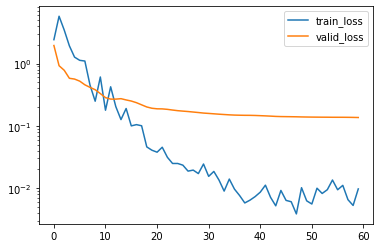

In [3]:
# Split the dataset into train and validation sets
siamese_dataset = SiameseNetworkDataset(config.compare_siamese_csv,
                                        transform=transforms.Compose([
                                            transforms.Resize((config.img_height,config.img_width)),
                                            transforms.ToTensor(),
                                            transforms.Normalize(0,1)]),
                                        should_invert=False)

num_train = round(0.9*siamese_dataset.__len__())
num_validate = siamese_dataset.__len__()-num_train



siamese_train, siamese_valid = random_split(siamese_dataset, [num_train,num_validate])

siamese_train_dataloader = DataLoader(siamese_train,
                        shuffle=True,
                        num_workers=8,
                        batch_size=config.train_batch_size)

siamese_valid_dataloader = DataLoader(siamese_valid,
                        shuffle=True,
                        num_workers=8,
                        batch_size=1)

# Training
netS = SiameseNetwork().cuda()
criterionS = ContrastiveLoss()
optimizer = optim.Adam(netS.parameters(),lr = config.learning_rate )
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,config.step_size, config.gamma)

netS, train_loss_historyS, valid_loss_historyS,dict_nameS = trainSiamese(netS,criterionS,optimizer,scheduler,siamese_train_dataloader,
             siamese_valid_dataloader,config.train_number_epochs,do_show=True)

## Train CNN with Cross Entropy Loss

In [4]:
cnn_dataset = CNNDataset(config.compare_cnn_csv,
                                        transform=transforms.Compose([
                                            transforms.Resize((config.img_height,config.img_width)),
                                            transforms.ToTensor(),
                                            transforms.Normalize(0,1)]),
                                        should_invert=False)

cnn_train_dataloader = DataLoader(cnn_dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=config.train_batch_size)

netC = CNN().cuda()
criterionC = CrossEntropyLoss()
optimizer = optim.Adam(netC.parameters(),lr = config.learning_rate )
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,config.step_size, config.gamma)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Epoch-0	 Train loss: 3.5828e+00


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Epoch-1	 Train loss: 1.0884e+00
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Epoch-2	 Train loss: 5.8030e-02
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.57it/s]


Epoch-3	 Train loss: 3.5270e-03
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Epoch-4	 Train loss: 4.0699e-03


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Epoch-5	 Train loss: 8.5626e-04
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Epoch-6	 Train loss: 1.6172e-04
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Epoch-7	 Train loss: 1.1228e-04
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.53it/s]


Epoch-8	 Train loss: 1.7847e-04


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.80it/s]


Epoch-9	 Train loss: 1.1252e-04


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.72it/s]


Epoch-10	 Train loss: 5.5559e-05
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.69it/s]


Epoch-11	 Train loss: 4.2902e-05
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Epoch-12	 Train loss: 3.7386e-05
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Epoch-13	 Train loss: 3.4180e-05
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Epoch-14	 Train loss: 3.2754e-05
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.71it/s]


Epoch-15	 Train loss: 2.9864e-05
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Epoch-16	 Train loss: 2.6817e-05
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Epoch-17	 Train loss: 2.2598e-05
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.71it/s]


Epoch-18	 Train loss: 1.8068e-05
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.71it/s]


Epoch-19	 Train loss: 1.3999e-05
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Epoch-20	 Train loss: 1.0702e-05
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Epoch-21	 Train loss: 8.1600e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Epoch-22	 Train loss: 6.2586e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.70it/s]


Epoch-23	 Train loss: 4.8394e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.56it/s]


Epoch-24	 Train loss: 3.7956e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Epoch-25	 Train loss: 3.0214e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Epoch-26	 Train loss: 2.4487e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Epoch-27	 Train loss: 2.0187e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Epoch-28	 Train loss: 1.6923e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.74it/s]


Epoch-29	 Train loss: 1.4450e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Epoch-30	 Train loss: 1.2556e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.45it/s]


Epoch-31	 Train loss: 1.1798e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Epoch-32	 Train loss: 1.1074e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Epoch-33	 Train loss: 1.0484e-06
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.57it/s]


Epoch-34	 Train loss: 9.9377e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Epoch-35	 Train loss: 9.5144e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Epoch-36	 Train loss: 9.1022e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Epoch-37	 Train loss: 8.7457e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Epoch-38	 Train loss: 8.4449e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Epoch-39	 Train loss: 8.1663e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Epoch-40	 Train loss: 7.9435e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


Epoch-41	 Train loss: 7.6984e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.48it/s]


Epoch-42	 Train loss: 7.4756e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.60it/s]


Epoch-43	 Train loss: 7.2528e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Epoch-44	 Train loss: 7.1080e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.52it/s]


Epoch-45	 Train loss: 6.9297e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.52it/s]


Epoch-46	 Train loss: 6.8406e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]


Epoch-47	 Train loss: 6.7626e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Epoch-48	 Train loss: 6.6957e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Epoch-49	 Train loss: 6.6400e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


Epoch-50	 Train loss: 6.5732e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.55it/s]


Epoch-51	 Train loss: 6.5175e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.57it/s]


Epoch-52	 Train loss: 6.4618e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Epoch-53	 Train loss: 6.3949e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Epoch-54	 Train loss: 6.3504e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.59it/s]


Epoch-55	 Train loss: 6.3058e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


Epoch-56	 Train loss: 6.2501e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


Epoch-57	 Train loss: 6.2055e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.53it/s]


Epoch-58	 Train loss: 6.1610e-07
new model saved


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.56it/s]


Epoch-59	 Train loss: 6.1387e-07
new model saved


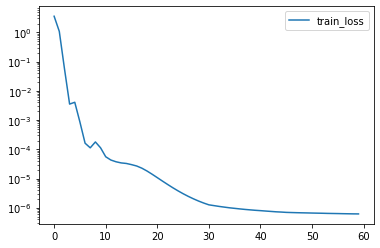

In [5]:
netC, train_loss_historyC, dict_nameC = trainCNN(netC,criterionC,optimizer,scheduler,cnn_train_dataloader,
             config.train_number_epochs,do_show=True)

In [6]:
test_dataset = CNNDataset(config.compare_test_csv,
                                        transform=transforms.Compose([
                                            transforms.Resize((config.img_height,config.img_width)),
                                            transforms.ToTensor(),
                                            transforms.Normalize(0,1)]),
                                        should_invert=False)

test_dataloader = DataLoader(test_dataset,
                        shuffle=False,
                        num_workers=1,
                        batch_size=1)
true_labels = []
for _,label in iter(test_dataloader):
    true_labels.append(int(label))

netS = SiameseNetwork().cuda()
netS.load_state_dict(torch.load(os.path.join("state_dict",dict_nameS)))
netS.eval()

siamese_precalculate_dataloader = DataLoader(cnn_dataset,
                        shuffle=False,
                        num_workers=1,
                        batch_size=1)

feature_vectors = []
temp = []
current_label = 0 #int(next(iter(siamese_precalculate_dataloader))[1])
for data,label in iter(siamese_precalculate_dataloader):
    v = (netS.forward_once(data.cuda()).detach().cpu().numpy())[0]
    if label==current_label:
        temp.append(v)
    else:
        current_label = label
        feature_vectors.append(deepcopy(temp))
        temp = []
        temp.append(v)
feature_vectors.append(deepcopy(temp))

inferenceS = []
for data, label in iter(test_dataloader):
    current_feature = netS.forward_once(data.cuda())
    dissims = []
    temp = 0
    for vectors in feature_vectors:
        for feature in vectors:
            temp += F.pairwise_distance(current_feature,torch.tensor(feature).cuda()).detach().cpu().numpy()
        dissims.append(temp / len(vectors))
        temp = 0
    inferenceS.append(np.argmin(dissims))
    
netC = SiameseNetwork().cuda()
netC.load_state_dict(torch.load(os.path.join("state_dict",dict_nameC)))
netC.eval()

inferenceC = []
for data, label in iter(test_dataloader):
    current_feature = netC.forward_once(data.cuda())
    inferenceC.append(np.argmax(current_feature.detach().cpu().numpy()))

accS = sum([true_labels[i]==inferenceS[i] for i in range(len(true_labels))])/len(true_labels)
accC = sum([true_labels[i]==inferenceC[i] for i in range(len(true_labels))])/len(true_labels)

print(tabulate(np.array([true_labels,inferenceS,inferenceC]).T, headers=["true labels", "Siamese", "CNN"]))

print("Siamese accuracy: %.4f"%(accS))
print("Convnet accuracy: %.4f"%(accC))

  true labels    Siamese    CNN
-------------  ---------  -----
            1         27     31
            2         23     26
            3          3     31
            4         17     26
            5          0     31
            6          6      6
            7          7     31
            8          0     26
            9          9     31
           10         10     13
           11         11     11
           12         12     12
           13         13     13
           14         29     14
           15         15     31
           16          0     26
           17          0     26
           18         18     18
           19         19     31
           20         20     20
           21         18     20
           22         22     31
           23         18     13
           24         24     24
           25          0      3
           26         26     26
           27         27     31
           28         28     18
           29         29     29
        